In [14]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [15]:
import pandas as pd

# Read from Pickle file

### Training Data

In [16]:
train = pd.read_pickle("dataset/all_jets_train_4D_100_percent.pkl")
train.head()

,m,pt,phi,eta
132784,3831.839355,22000.609375,1.567018,1.142924
99666,4582.417480,21648.210938,-2.680558,0.213654
26629,16747.765625,169514.281250,-1.948239,1.163296
80473,14789.586914,183085.609375,-1.641102,2.670927
48229,4646.724121,20527.130859,2.922270,-1.158871


### Test Data

In [17]:
test = pd.read_pickle("dataset/all_jets_test_4D_100_percent.pkl")
test.head()

,m,pt,phi,eta
85972,4983.729980,23798.070312,1.962157,-0.059532
38742,5435.273438,21881.867188,1.035412,0.734343
128711,5239.408691,24608.134766,-1.121055,0.828848
28751,14121.240234,203110.953125,0.324205,-2.571108
131358,3344.826660,24897.294922,0.395331,1.440069


# Data Analysis
Number of Training set examples: 111,778 

Number of Test set examples: 27,945

Train/Test Percentage: 60:40

## Visualization

In [18]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(10)
import seaborn as sns; sns.set(color_codes=True)

Code inspired from (https://github.com/Skelpdar/HEPAutoencoders/blob/master/process_ROOT_4D.ipynb)

In [19]:
# Store all the figures in the figures/ folder
figures_folder = 'figures/'

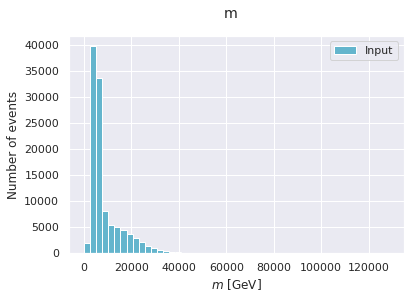

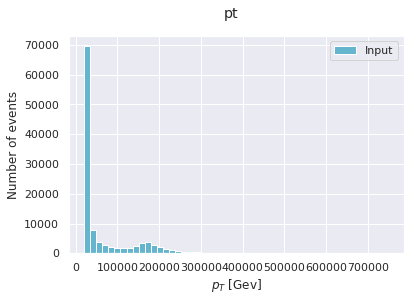

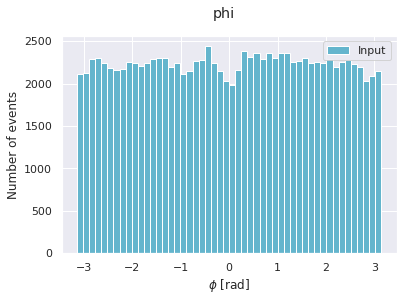

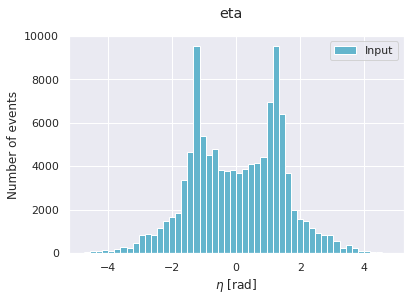

In [20]:
plt.close('all')
unit_list = ['[GeV]', '[Gev]', '[rad]', '[rad]']
variable_list = [r'$m$', r'$p_T$', r'$\phi$', r'$\eta$']
line_style = ['--', '-']
colors = ['orange', 'c']
markers = ['*', 's']

# Histograms
alpha = 1
n_bins = 50
for i in np.arange(4):
    plt.figure(i + 4)
    n_hist_data, bin_edges, _ = plt.hist(train.iloc[:,i], color=colors[1], label='Input', alpha=alpha, bins=n_bins)
    plt.suptitle(test.columns[i])
    plt.xlabel(variable_list[i] + ' ' + unit_list[i])
    plt.ylabel('Number of events')
    plt.legend()
    fig_name = 'train_data_hist_%s' % train.columns[i]
#     plt.savefig(figures_folder + fig_name)

### Mean and Std of each variable

In [21]:
print("Std:\n", train.std())
print("Mean:\n", train.mean())

Std:
 m       7421.270111
pt     69874.993026
phi        1.803151
eta        1.448439
dtype: float64
Mean:
 m       8941.356799
pt     64458.683471
phi        0.001691
eta        0.043500
dtype: float64


## Data Preprocessing
#### Why scaling helps: https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

In [29]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Scaling some features
# MinMax scaler preseves the shape, range is 0-1, doesn't reduce the outliers. Usually a good start.
# scaler = MinMaxScaler()

# Better for NNs, mean = 0, variance = 1. Normalizes your data. If you have outliers, this will be a good scale.
scaler = StandardScaler()

# NN works best with scaled data
train[['m', 'pt', 'phi', 'eta']] = scaler.fit_transform(train[['m', 'pt', 'phi', 'eta']])


# test[['m', 'pt', 'phi', 'eta']] = scaler.fit_transform(train[['m', 'pt', 'phi', 'eta']])

train.head()

,m,pt,phi,eta
132784,-0.688499,-0.607632,0.868110,0.759044
99666,-0.587360,-0.612675,-1.487541,0.117475
26629,1.051901,1.503486,-1.081406,0.773109
80473,0.788040,1.697710,-0.911072,1.813980
48229,-0.578695,-0.628719,1.619716,-0.830119


### Plot the scaled data

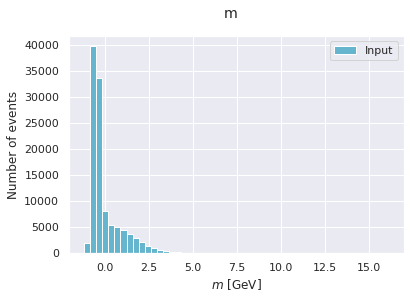

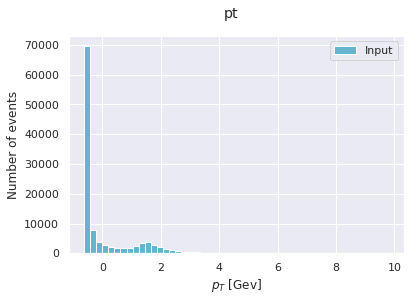

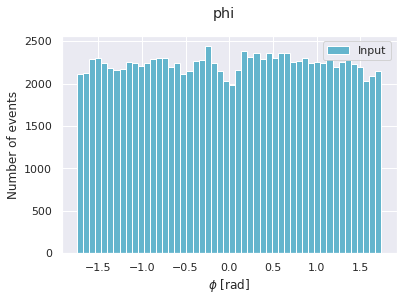

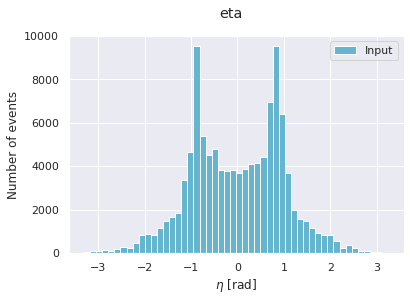

In [30]:
plt.close('all')
unit_list = ['[GeV]', '[Gev]', '[rad]', '[rad]']
variable_list = [r'$m$', r'$p_T$', r'$\phi$', r'$\eta$']
line_style = ['--', '-']
colors = ['orange', 'c']
markers = ['*', 's']

# Histograms
alpha = 1
n_bins = 50
for i in np.arange(4):
    plt.figure(i + 4)
    n_hist_data, bin_edges, _ = plt.hist(train.iloc[:,i], color=colors[1], label='Input', alpha=alpha, bins=n_bins)
    plt.suptitle(test.columns[i])
    plt.xlabel(variable_list[i] + ' ' + unit_list[i])
    plt.ylabel('Number of events')
    plt.legend()
    fig_name = 'train_data_hist_%s' % train.columns[i]
#     plt.savefig(figures_folder + fig_name)